<a href="https://colab.research.google.com/github/burapauq/burapa-chiwpreecha/blob/main/Bank_Churn_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bank Churn Prediction Project**

Course: Data Science and Big Data Analytics



In [ ]:
# import all necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**1) อ่านชุดข้อมูลจาก URL**

In [ ]:
URL = 'https://raw.githubusercontent.com/burapauq/DataSci/main/train.csv'
df = pd.read_csv(URL)

**2) การสํารวจข้อมูล (Data Understanding)**

In [ ]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [ ]:
df.shape

(165034, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [ ]:
df.isnull().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df[df.duplicated()]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [ ]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


Exploratory Data Analysis (EDA)

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title='Bank Churn Prediction Project Report', explorative=True)

In [ ]:
profile.to_file("Bank Churn Prediction Project Report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:06<00:00,  2.19it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

การวิเคราะห์พฤติกรรมและแนวโน้มการปิดบัญชีของลูกค้า (Customer Churn Analysis)

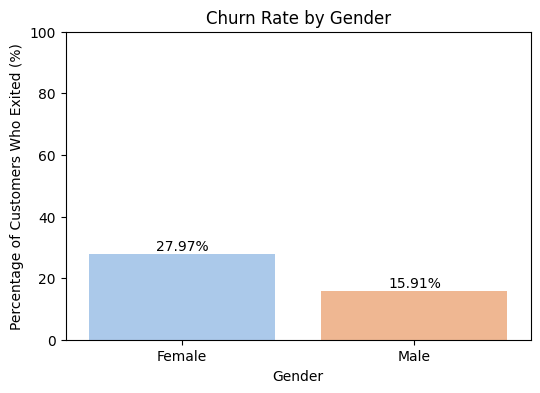

In [ ]:
total_by_gender = df.groupby('Gender').size()
exited_by_gender = df[df['Exited'] == 1].groupby('Gender').size()

churn_rate = (exited_by_gender / total_by_gender) * 100

plot_df = churn_rate.reset_index()
plot_df.columns = ['Gender', 'Churn_Rate']

plt.figure(figsize=(6,4))
ax = sns.barplot(data=plot_df, x='Gender', y='Churn_Rate', palette='pastel')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{height:.2f}%', ha='center')

plt.title('Churn Rate by Gender')
plt.ylabel('Percentage of Customers Who Exited (%)')
plt.ylim(0, 100)
plt.show()

1. จากกราฟจะเห็นได้ว่า ลูกค้าเพศหญิง (Female) มีแนวโน้มในการปิดบัญชีสูงกว่าเพศชาย (Male)

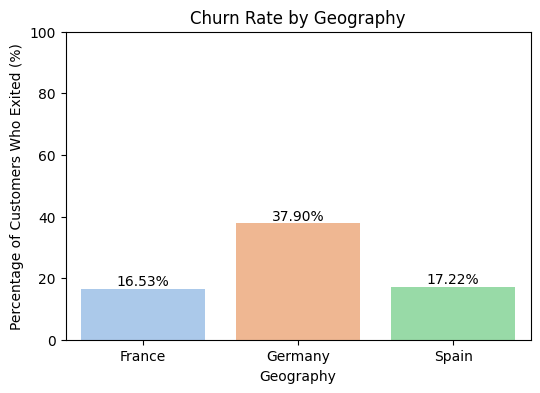

In [ ]:
total_by_geography = df.groupby('Geography').size()
exited_by_geography = df[df['Exited'] == 1].groupby('Geography').size()

churn_rate = (exited_by_geography / total_by_geography) * 100

plot_df = churn_rate.reset_index()
plot_df.columns = ['Geography', 'Churn_Rate']

plt.figure(figsize=(6,4))
ax = sns.barplot(data=plot_df, x='Geography', y='Churn_Rate', palette='pastel')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{height:.2f}%', ha='center')

plt.title('Churn Rate by Geography')
plt.ylabel('Percentage of Customers Who Exited (%)')
plt.ylim(0, 100)
plt.show()

2. จากกราฟจะเห็นได้ว่า ลูกค้าที่อาศัยอยู่ในประเทศเยอรมนี (Germany) มีแนวโน้มในการปิดบัญชีมากที่สุด รองลงมาคือ สเปน (Spain) และฝรั่งเศส (France) ตามลำดับ

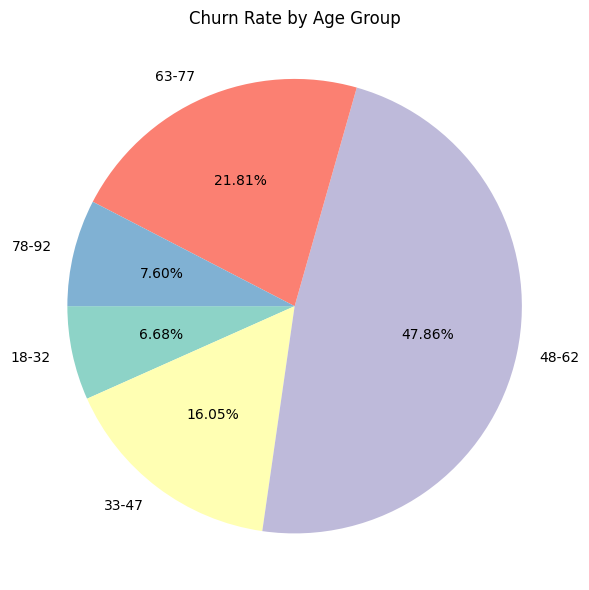

In [ ]:
bins = list(range(18, 100, 15))
labels = [f'{i}-{i + 14}' for i in bins[:-1]]

age_group_all = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
total_by_age_group = age_group_all.value_counts().sort_index()

age_group_exited = pd.cut(df[df['Exited'] == 1]['Age'], bins=bins, labels=labels, right=False)
exited_by_age_group = age_group_exited.value_counts().sort_index()

churn_rate_by_age_group = (exited_by_age_group / total_by_age_group) * 100

plt.figure(figsize=(6, 6))
plt.pie(
    churn_rate_by_age_group,
    labels=churn_rate_by_age_group.index,
    autopct='%1.2f%%',
    startangle=180,
    colors=plt.cm.Set3.colors
)
plt.title('Churn Rate by Age Group')
plt.axis('equal')
plt.tight_layout()
plt.show()

 3. จากกราฟจะเห็นได้ว่า ลูกค้าที่มีช่วงอายุ 48-62 ปี มีแนวโน้มในการปิดบัญชีมากที่สุด รองลงมาคือ ช่วง 63-77, 33-47  78-92 และ 18-32 ปี ตามลำดับ

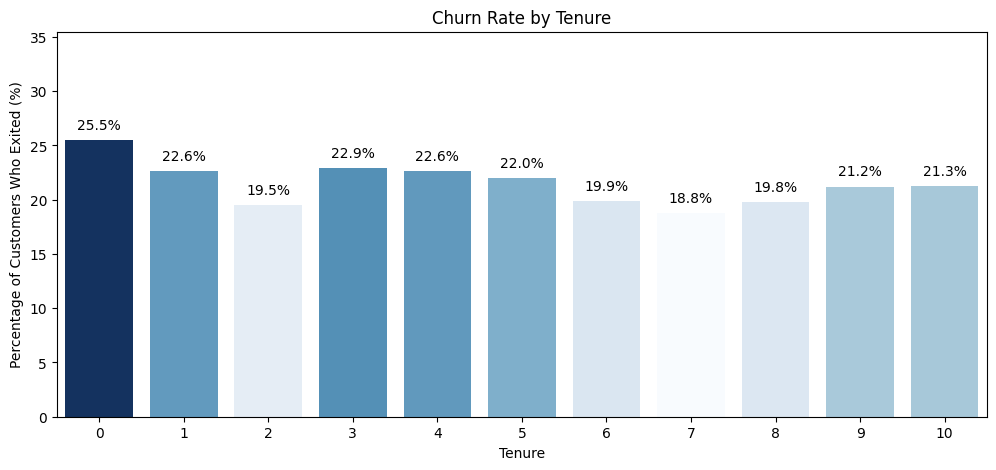

In [ ]:
from matplotlib import cm
from matplotlib.colors import Normalize

total_by_tenure = df.groupby('Tenure').size()
exited_by_tenure = df[df['Exited'] == 1].groupby('Tenure').size()

churn_rate = (exited_by_tenure / total_by_tenure) * 100

plot_df = churn_rate.reset_index()
plot_df.columns = ['Tenure', 'Churn_Rate']

norm = Normalize(vmin=plot_df['Churn_Rate'].min(), vmax=plot_df['Churn_Rate'].max())
colors = [cm.Blues(norm(value)) for value in plot_df['Churn_Rate']]

plt.figure(figsize=(12, 5))
ax = sns.barplot(data=plot_df, x='Tenure', y='Churn_Rate', palette=colors)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{height:.1f}%', ha='center')

plt.title('Churn Rate by Tenure')
plt.ylabel('Percentage of Customers Who Exited (%)')
plt.ylim(0, plot_df['Churn_Rate'].max() + 10)
plt.show()

4. จากกราฟจะเห็นได้ว่า ลูกค้าที่มีระยะเวลายังไม่เคยมีครบ 1 ปีเต็ม มีแนวโน้มในการปิดบัญชีสูงที่สุด รองลงมาคือ ระยะเวลา 3  ปี, 1 และ 4 ปี, 5 ปี และอื่น ๆ ตามลำดับ

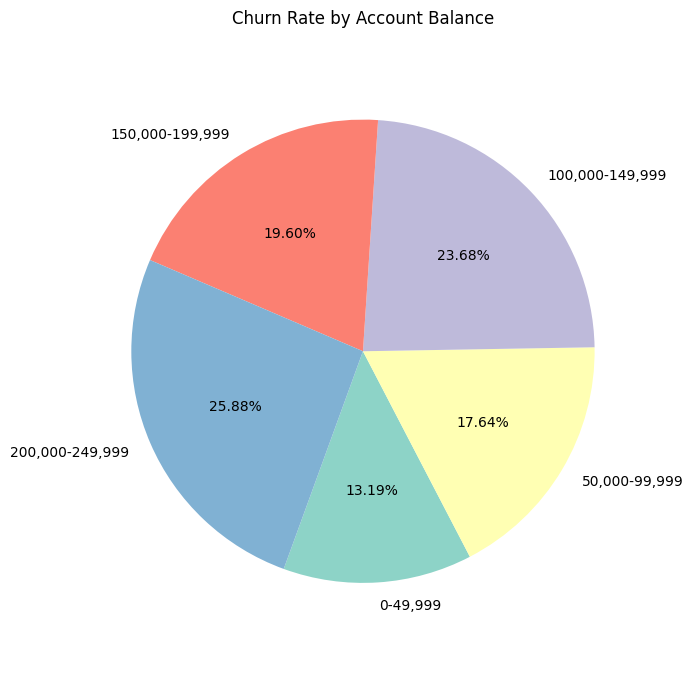

In [ ]:
bins = list(range(0, 300000, 50000))
labels = [f'{i:,}-{i+49999:,}' for i in bins[:-1]]

balance_group_exited = pd.cut(df[df['Exited'] == 1]['Balance'], bins=bins, labels=labels, right=False)
exited_by_balance_group = balance_group_exited.value_counts().sort_index()

balance_group_all = pd.cut(df['Balance'], bins=bins, labels=labels, right=False)
total_by_balance_group = balance_group_all.value_counts().sort_index()

churn_rate_by_balance_group = (exited_by_balance_group / total_by_balance_group) * 100

plt.figure(figsize=(7, 7))
plt.pie(
    churn_rate_by_balance_group,
    labels=churn_rate_by_balance_group.index,
    autopct='%1.2f%%',
    startangle=250,
    colors=plt.cm.Set3.colors
)
plt.title('Churn Rate by Account Balance')
plt.axis('equal')
plt.tight_layout()
plt.show()

5. จากกราฟจะเห็นได้ว่า ลูกค้าที่อยู่ในช่วงรายได้  200K-249K มีแนวโน้มในการปิดบัญชีสูงที่สุด รองลงมาคือ  100K-149K, 150K-199K, 50K-99K, 0-49K และ 250K+ ตามลำดับ

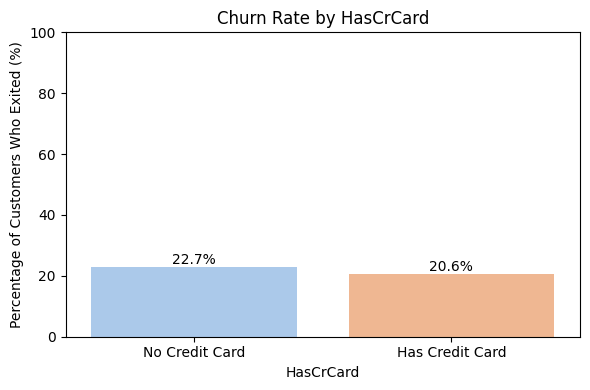

In [ ]:
total_by_card = df.groupby('HasCrCard').size()
exited_by_card = df[df['Exited'] == 1].groupby('HasCrCard').size()

churn_rate = (exited_by_card / total_by_card) * 100

plot_df = churn_rate.reset_index()
plot_df.columns = ['HasCrCard', 'Churn_Rate']

plot_df['HasCrCard'] = plot_df['HasCrCard'].map({0: 'No Credit Card', 1: 'Has Credit Card'})

plt.figure(figsize=(6,4))
ax = sns.barplot(data=plot_df, x='HasCrCard', y='Churn_Rate', palette='pastel')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 1, f'{height:.1f}%', ha='center')

plt.title('Churn Rate by HasCrCard')
plt.ylabel('Percentage of Customers Who Exited (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

6. จากกราฟจะเห็นได้ว่า ลูกค้าที่ไม่มีบัตรเครดิต (No Credit Card) มีแนวโน้มในการปิดบัญชีมากกว่าลูกค้าที่มีบัตรเครดิต (Has Credit Card)

Encoding categorical features

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(df[['Geography','Gender']])
df[['Geography','Gender']] = enc.transform(df[['Geography','Gender']])

In [ ]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,0.0,1.0,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,0.0,1.0,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,0.0,1.0,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,0.0,1.0,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,2.0,1.0,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,2.0,0.0,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,0.0,1.0,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,0.0,1.0,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,2.0,0.0,30.0,7,161533.00,1,0.0,1.0,71173.03,0


Correlation Heatmap

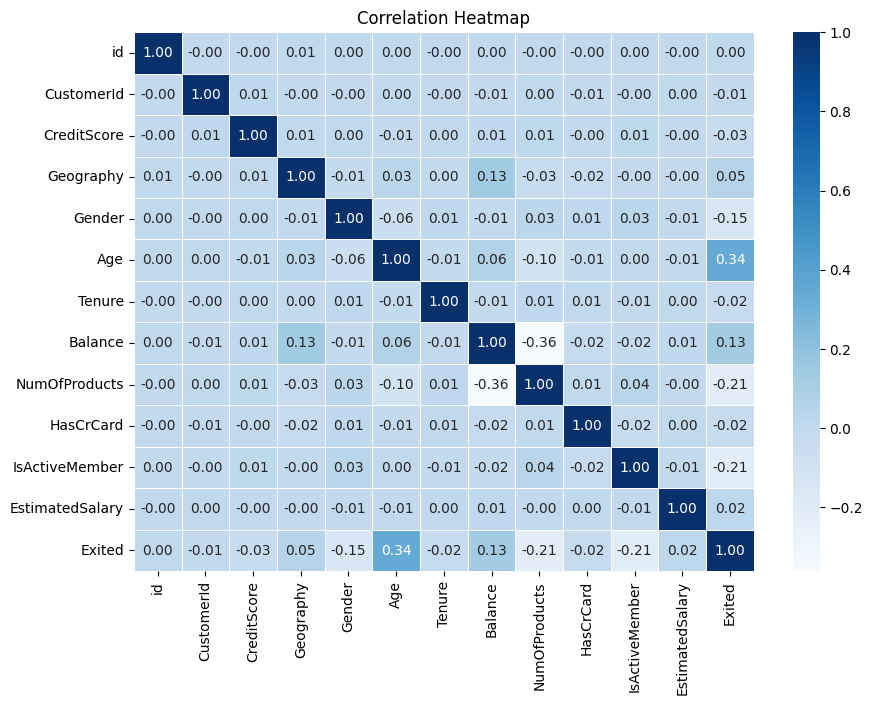

In [ ]:
numeric_cols = df.select_dtypes(include='number').columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

3) การเตรียมข้อมูล (Data Preparation)

In [ ]:
X = df.drop(['id', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0.0,1.0,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0.0,1.0,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0.0,1.0,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0.0,1.0,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2.0,1.0,33.0,5,0.00,2,1.0,1.0,15068.83


In [ ]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,0.0,1.0,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,0.0,1.0,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,0.0,1.0,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,0.0,1.0,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,2.0,1.0,33.0,5,0.00,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...
165029,667,2.0,0.0,33.0,2,0.00,1,1.0,1.0,131834.75
165030,792,0.0,1.0,35.0,3,0.00,1,0.0,0.0,131834.45
165031,565,0.0,1.0,31.0,5,0.00,1,1.0,1.0,127429.56
165032,554,2.0,0.0,30.0,7,161533.00,1,0.0,1.0,71173.03


In [ ]:
y.head()

,Exited
0,0
1,0
2,0
3,0
4,0


In [ ]:
y

,Exited
0,0
1,0
2,0
3,0
4,0
...,...
165029,0
165030,0
165031,0
165032,0


In [ ]:
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 130113), (1, 34921)]


In [ ]:
!pip install imbalanced-learn

In [ ]:
from imblearn.combine import SMOTETomek
sm = SMOTETomek()
X, y = sm.fit_resample(X, y)

In [ ]:
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 118779), (1, 118779)]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=109)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-1.27350127, -0.90126381, -1.09121188, ..., -1.8367111 ,
         0.86242077, -0.38269107],
       [-0.06103877, -0.90126381,  1.03838511, ..., -0.04256941,
         1.23207215,  1.28108951],
       [-0.9084588 , -0.90126381, -1.09121188, ...,  0.62123669,
        -0.90338121,  1.39249403],
       ...,
       [-1.42994805,  1.75449386, -1.09121188, ...,  0.62123669,
         1.23207215, -0.61149756],
       [ 1.02105143,  1.75449386,  1.03838511, ...,  0.62123669,
        -0.90338121, -0.66065195],
       [ 0.36918987,  1.75449386,  1.03838511, ...,  0.62123669,
         1.23207215, -0.15474885]])

In [ ]:
X_test

array([[-0.26963447,  0.1118762 ,  0.53362005, ...,  0.62123669,
         0.725919  , -0.21283991],
       [-0.96060772, -0.90126381,  1.03838511, ...,  0.62123669,
         1.23207215,  0.73551846],
       [-1.06490557,  0.42661502, -1.09121188, ...,  0.62123669,
        -0.90338121, -1.89788001],
       ...,
       [-1.7037299 , -0.90126381,  1.03838511, ...,  0.62123669,
         1.23207215,  1.12922145],
       [ 0.48652495, -0.90126381,  1.03838511, ...,  0.62123669,
        -0.90338121,  0.54881352],
       [-2.04269792, -0.90126381,  1.03838511, ...,  0.62123669,
         1.23207215, -0.65111231]])

4) การสร้างและประเมินโมเดล (Building and Evaluation Model )

Ensembles : Random Forests

In [ ]:
# 1. Import the model class from scikit-learn
from sklearn.ensemble import RandomForestClassifier

# 2. Instantiate the model with default hyperparameters (or customize them)
RF_model = RandomForestClassifier()

# 3. Fit the model to the training data
RF_model.fit(X_train, y_train)

# 4. Predict the labels for the test set
y_pred = RF_model.predict(X_test)

Evaluating Model for classification

In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy of Random Forest model :", accuracy)
print(f"Accuracy of Random Forest model (in %) : {accuracy * 100:.2f}%")

Accuracy of Random Forest model : 0.9122326991075939
Accuracy of Random Forest model (in %) : 91.22%


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[33456  2346]
 [ 3909 31557]]


Feature importance

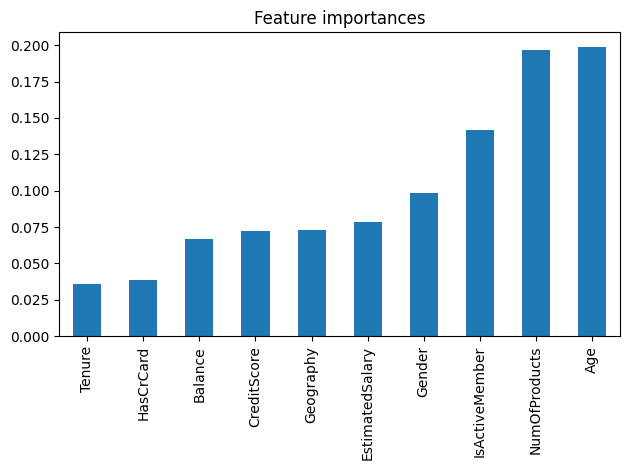

In [ ]:
feature_names = X.columns
importances = RF_model.feature_importances_

forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=True)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances")
fig.tight_layout()

plt.show()

Model Accuracy Results

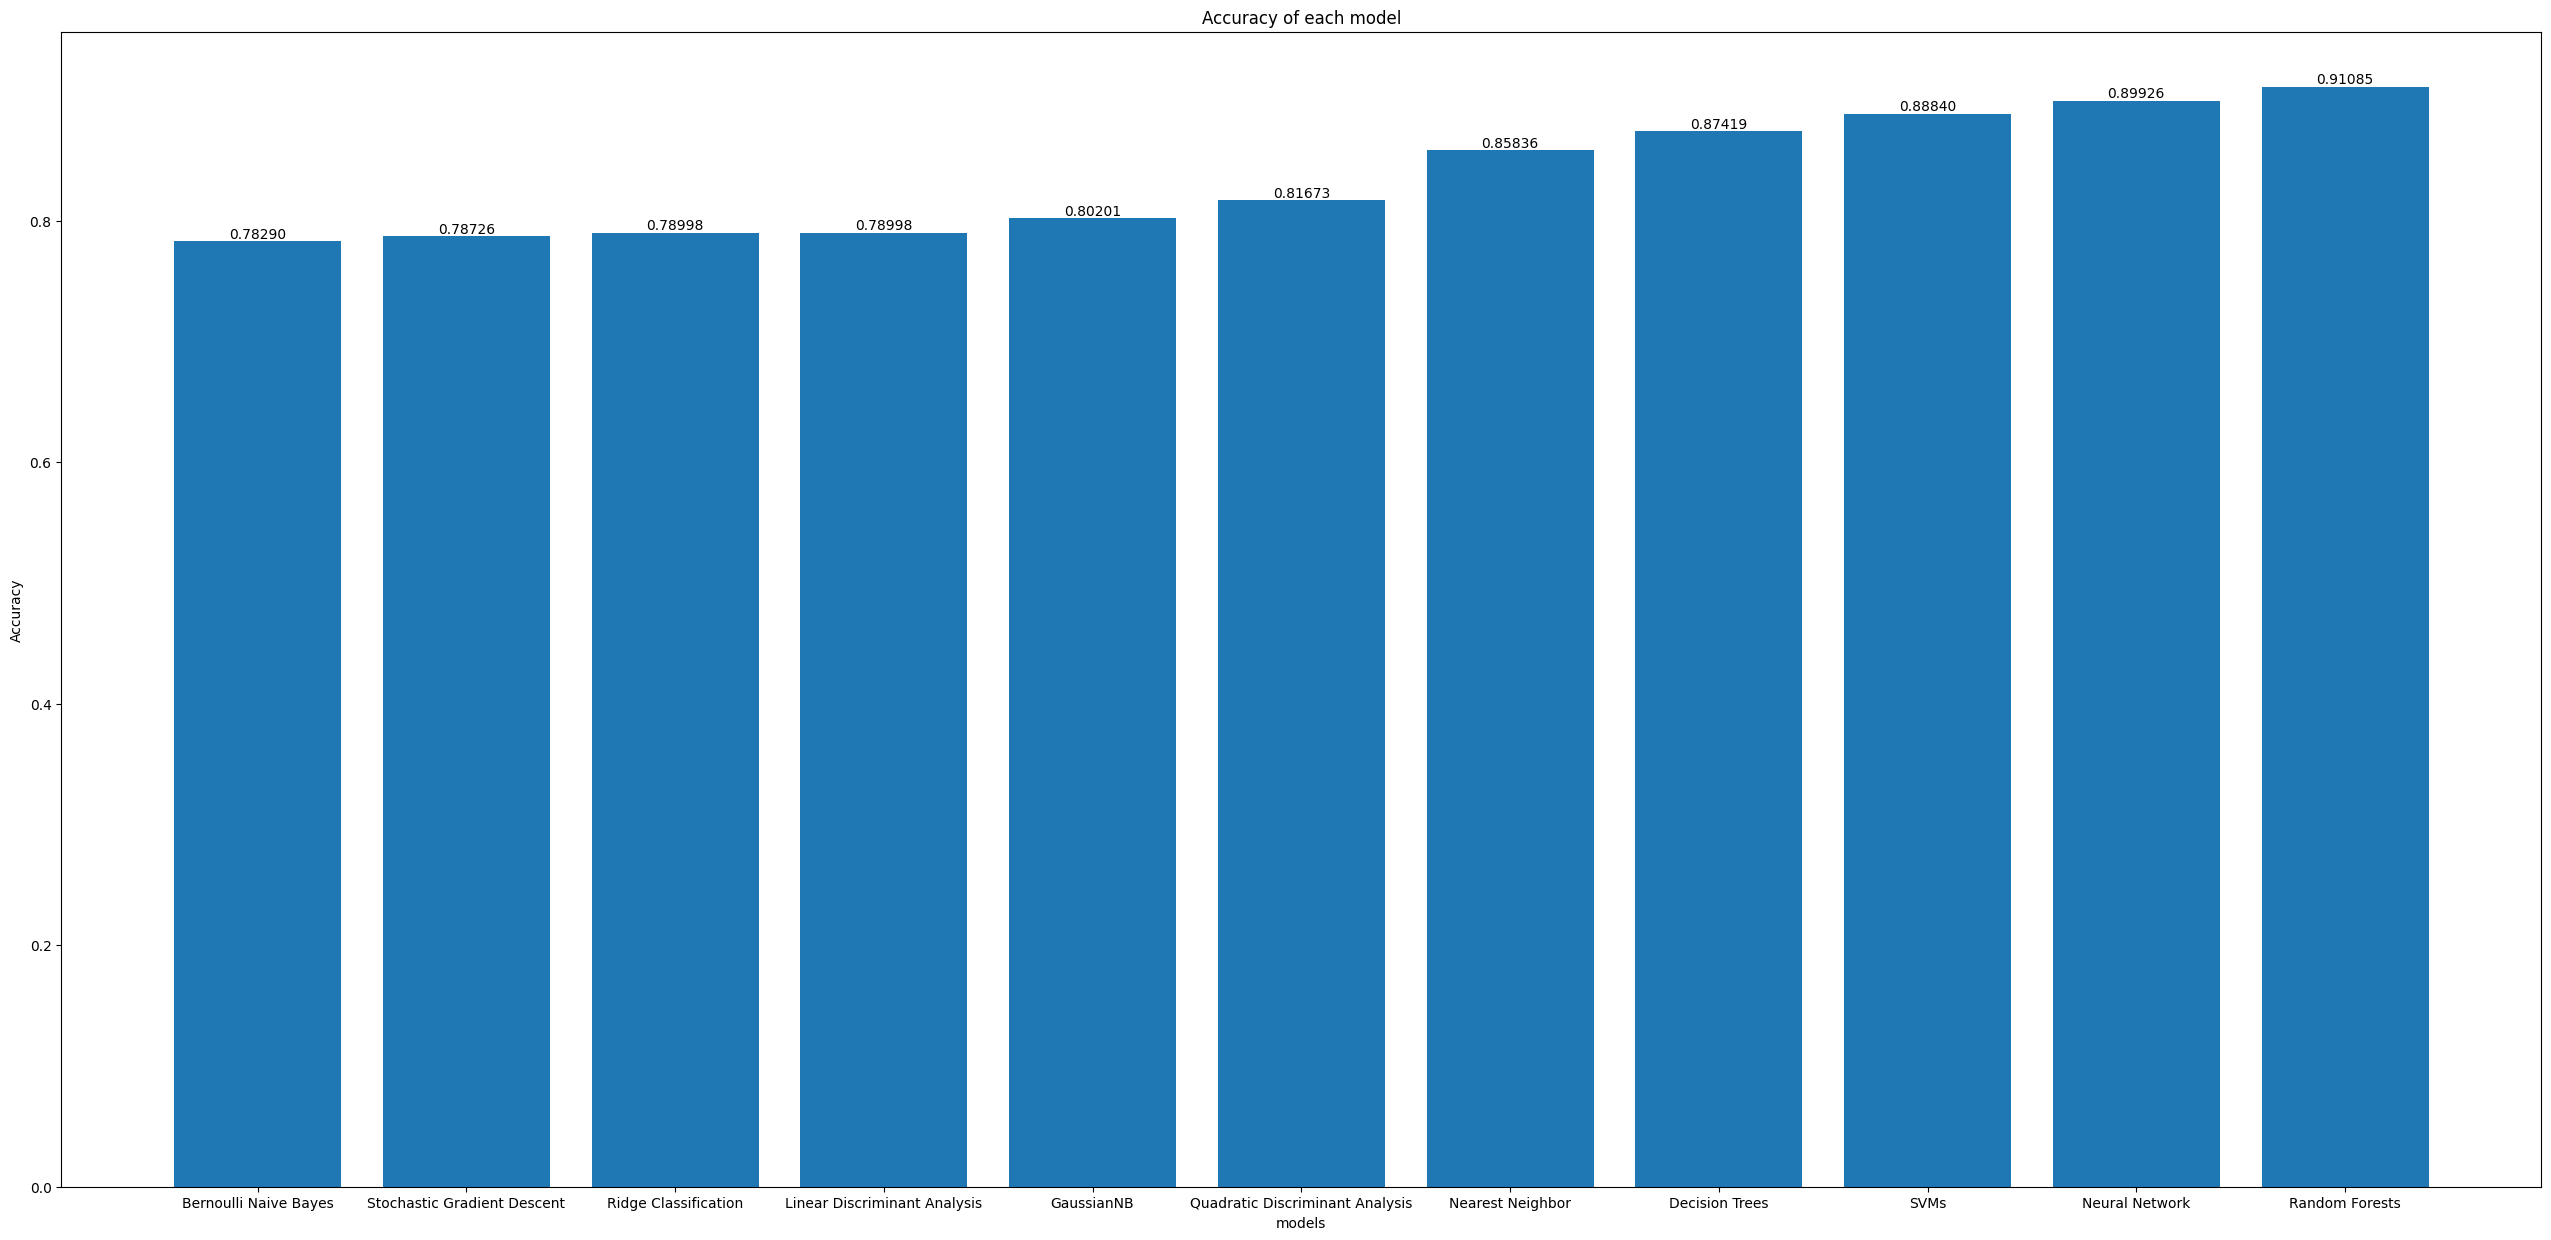

In [ ]:
Accuracy_of_Model = {'Categories': ['GaussianNB', 'Random Forests', 'Neural Network', 'Decision Trees', 'Nearest Neighbor', 'Stochastic Gradient Descent', 'SVMs', 'Linear Discriminant Analysis', 'Quadratic Discriminant Analysis', 'Bernoulli Naive Bayes', 'Ridge Classification'],
            'Values' : [0.8020125750856116, 0.9108516252175377, 0.8992589681693145,  0.8741930051086285, 0.8583618705439847, 0.7872621119407175, 0.8883961151967664, 0.789984842530736, 0.8167349688429798, 0.7828973221804301,  0.789984842530736]}
AcOfModel = pd.DataFrame(Accuracy_of_Model)
AcOfModel_sorted = AcOfModel.sort_values('Values')

plt.figure(figsize=(32, 15))
plt.bar(AcOfModel_sorted['Categories'], AcOfModel_sorted['Values'])
plt.title('Accuracy of each model')
plt.xlabel('models')
plt.ylabel('Accuracy')

for i, value in enumerate(AcOfModel_sorted['Values']):
    plt.text(i, value, '{:.5f}'.format(value), ha='center', va='bottom')

plt.show()